# Brain Tumor Detection Using Parallel Processing

## Assignment Overview
In this assignment, you will be tasked with developing a machine learning model for detecting brain tumors from MRI images. You will leverage the power of parallel processing to efficiently handle the large dataset and speed up the computation-intensive tasks involved in image processing and model training.

## Dataset
The dataset consists of MRI images classified into two categories:
- `yes`: Images that contain brain tumors.
- `no`: Images that do not contain brain tumors.

Your goal is to preprocess these images using various filters and techniques, extract relevant features, then train a machine learning model to accurately classify the images as having a tumor or not.

## Parallel Processing
To optimize the performance of your image processing and model training, you are required to implement parallel processing techniques. This could involve using Python's `multiprocessing` and `threading` module to parallelize tasks such as image preprocessing, feature extraction (applying filters), or model training.

## Objectives
1. Load the MRI images using OpenCV.
2. Implement parallel processing to efficiently handle image processing and model training.
3. Train a machine learning model for brain tumor classification.
4. Evaluate the performance of your model on a test set.

## Submission
- Your submission should include the completed Jupyter Notebook with all the code for loading the data, preprocessing, parallel processing implementation, model training, and evaluation. 
- Additionally, provide a brief report discussing your approach, and explaining your code the results obtained.


# Part I: Guided Code (60%)
The following cells in this notebook will demonstrate a sequential example of the brain tumor detection process. This example includes steps such as data loading, pre-processing, feature extraction using methods like GLCM (Gray Level Co-occurrence Matrix) and LBP (Local Binary Patterns), and finally, classification. This sequential process serves as a baseline for what you are expected to parallelize.

## Your Task
After understanding the sequential processing steps, your task is to refactor the code to utilize multiprocessing or multithreading approaches, aiming to reduce the overall processing time. You should focus on parallelizing the most time-consuming tasks identified in the sequential example, such as image processing and feature extraction.

<span style="color: red;">**Remember**: the efficiency of your parallel processing implementation will be evaluated based on the reduction in processing time and the accuracy of your model.</span>

## Data Reading

In this section, we will load the MRI images from the dataset. The dataset consists of two folders: `yes` and `no`, representing images with and without brain tumors, respectively. We will use the `glob` module to list all the image files in these directories and then read them into memory for further processing.

### Creating a reading function

In [ ]:
import glob
import cv2

def read_images(images_path):
    """
    Reads all images from a specified path using OpenCV.

    Parameters:
        - images_path (str): The path to the directory containing the images.
    Returns:
        - images (list): A list of images read from the directory.
    """
    images = []
    for file_path in images_path:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
                images.append(image)
    return images

### Runing the reading function

In [ ]:
# Define the path to the dataset
dataset_path = '../data/brain_tumor_dataset/'

# List all image files in the 'yes' and 'no' directories
yes_images = glob.glob(dataset_path + 'yes/*.jpg')
no_images = glob.glob(dataset_path + 'no/*.jpg')

yes_images = read_images(yes_images)
no_images = read_images(no_images)

print(f"Number of 'yes' images: {len(yes_images)}")
print(f"Number of 'no' images: {len(no_images)}")

Number of 'yes' images: 86
Number of 'no' images: 85


## Appyling filters to the images

In this section, we apply various filters to the images to enhance their features. The filters used are:

1. **Entropy Filter**: This filter measures the randomness in the image, highlighting regions with high information content (e.g., edges).

2. **Gaussian Filter**: This filter smooths the image by blurring it, reducing noise and details.

3. **Sobel Filter**: This edge-detection filter highlights the gradients (edges) in the image.

4. **Gabor Filter**: This filter is used for texture analysis, emphasizing edges and texture patterns.

5. **Hessian Filter**: This filter enhances blob-like structures in the image.

6. **Prewitt Filter**: Another edge-detection filter, similar to the Sobel filter, but with a different kernel.

The folowing code is how these filtres are applied to one image (<span style="color: red;">*Your job is to apply them to all images.*</span>).

### Code the applying the filters


In [1]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage as nd
from skimage.filters import sobel, gabor, hessian, prewitt
import matplotlib.pyplot as plt

In [ ]:
image = yes_images[0]

# Apply filters
entropy_img = entropy(image, disk(2))
gaussian_img = nd.gaussian_filter(image, sigma=1)
sobel_img = sobel(image)
gabor_img = gabor(image, frequency=0.9)[1]
hessian_img = hessian(image, sigmas=range(1, 100, 1))
prewitt_img = prewitt(image)

# Store the original and filtered images in a dictionary
filtered_images = {
    'Original': image,
    'Entropy': entropy_img,
    'Gaussian': gaussian_img,
    'Sobel': sobel_img,
    'Gabor': gabor_img,
    'Hessian': hessian_img,
    'Prewitt': prewitt_img
}

### Displaying the results

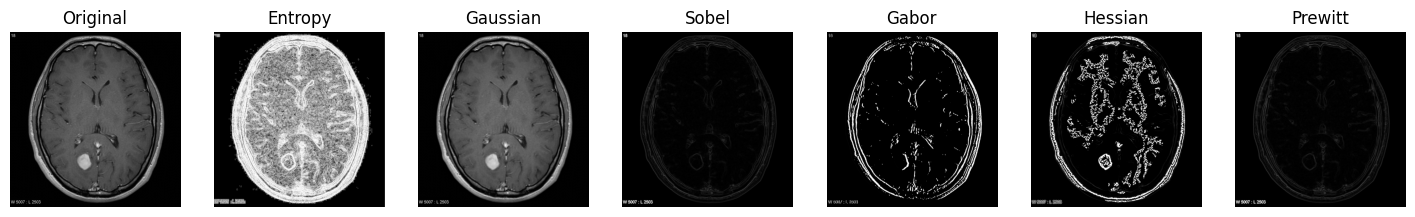

In [6]:
# Display each filtered image
plt.figure(figsize=(18, 3))
for i, (filter_name, filtered_image) in enumerate(filtered_images.items()):
        plt.subplot(1, len(filtered_images), i + 1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(filter_name)
        plt.axis('off')
plt.show()

## <span style="color: blue;">Parallel Image Filtering</span>

In this part of the assignment, you will create a function for each filter and apply them in parallel to the images. You will store the results in dictionaries, similar to the example shown previously. Make sure to handle synchronization appropriately, as multiple threads or processes will access the images.

### <span style="color: green;">Tasks</span>
1. **Sequential execution:**
        1. Loop through the images in both lists: `yes_images` and `no_images` and apply the filters in parallel.
        2. For each image, create a dictionary containing the original and filtered images.
        3. Store these dictionaries in two lists: `yes_inputs` for images with tumors and `no_inputs` for images without tumors.
        4. Time the execution to compute the speed up and the efficiency later.
2. **Parallel execution:**
        1. Create a separate function for each filter and write to be executed in parallel using either multiprocessing or multithreading.
        2. Use a multiprocessing or multithreading (*whatever you wish, from what you have learned in this course*) to manage parallel execution of the filter functions on the images and or the concurrent application on multiple images at the same time.
        3. Implement synchronization mechanisms to ensure safe access to shared resources.
        4. Measure the execution time of the parallel processing to compare it with the sequential execution.
### <span style="color: red;">Warning</span>
- Be cautious about the concurrent access to images by multiple threads or processes. Use appropriate synchronization mechanisms to prevent race conditions and ensure data integrity.
- Carefully choose which parallelization paradigm you will use. *Efficiency* and *Speed* are of utmost importance. You need to see a positive impact on the speedup.
### <span style="color: green;">**Hint:**</span>
When you run you code for testing, run it only one the 4 or 5 first image. Only run on all images in the final version.

In [ ]:
## The sequential version

import time
from tqdm import tqdm

def process_images(images):
    processed_images = []
    for image in tqdm(images[:5]):
        filtered_images = {
            'Original': image,
            'Entropy': entropy(image, disk(2)),
            'Gaussian': nd.gaussian_filter(image, sigma=1),
            'Sobel': sobel(image),
            'Gabor': gabor(image, frequency=0.9)[1],
            'Hessian': hessian(image, sigmas=range(1, 100, 1)),
            'Prewitt': prewitt(image)
        }
        processed_images.append(filtered_images)
    return processed_images

# Example usage
start_time = time.time()
yes_inputs = process_images(yes_images)
no_inputs = process_images(no_images)
end_time = time.time()

execution_time = end_time - start_time
print(f"Sequential execution time: {execution_time} seconds")


100%|██████████| 5/5 [02:58<00:00, 35.67s/it]

Sequential execution time: 545.7813749313354 seconds


In [2]:
import time
import numpy as np
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor  # Switch to threads
from skimage.filters import sobel, prewitt, hessian, gabor
from skimage.filters.rank import entropy
from skimage.morphology import disk
import scipy.ndimage as nd
import multiprocessing

CPU_CORES = max(1, multiprocessing.cpu_count() - 2)  # Reduce workers for debugging

def process_single_image(image):
    """Applies filters using CPU (no GPU)."""
    try:
        entropy_img = entropy(image, disk(2)) if image.size > 256 else None
        gaussian_img = nd.gaussian_filter(image, sigma=1)
        sobel_img = sobel(image)
        prewitt_img = prewitt(image)
        gabor_img = gabor(image, frequency=0.6)[1]

        # Adaptive Hessian sigma values based on image size
        max_sigma = min(image.shape) // 10
        hessian_img = hessian(image, sigmas=np.linspace(1, max_sigma, 5))

        return {
            'Original': image,
            'Entropy': entropy_img,
            'Gaussian': gaussian_img,
            'Sobel': sobel_img,
            'Gabor': gabor_img,
            'Hessian': hessian_img,
            'Prewitt': prewitt_img
        }
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

def process_images_parallel(images):
    """Processes images in parallel using CPU."""
    processed_images = []
    executor_class = ThreadPoolExecutor  # Use threads for debugging

    with executor_class(max_workers=CPU_CORES) as executor:
        results = list(tqdm(executor.map(process_single_image, images), total=len(images)))
        processed_images.extend([res for res in results if res is not None])

    return processed_images

# Sample images (replace with actual image data)
yes_images = [np.random.rand(256, 256) for _ in range(2)]  # Test with a smaller batch
no_images = [np.random.rand(256, 256) for _ in range(2)]   # Test with a smaller batch

# Start timing
start_time = time.time()
yes_inputs = process_images_parallel(yes_images)
no_inputs = process_images_parallel(no_images)
end_time = time.time()

# Execution time
execution_time = end_time - start_time
print(f"Ultimate Optimized Execution Time: {execution_time:.2f} seconds")





/Users/ronny/anaconda3/lib/python3.11/concurrent/futures/thread.py:58: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  result = self.fn(*self.args, **self.kwargs)
100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

Ultimate Optimized Execution Time: 0.54 seconds


## Analsys:
- Explain you parallelization>
- Analyze the speedup and efficiency of the parallel execution. Discuss the results and any trade-offs encountered.


## Your analysis here (Convert this to markdown).

I used `ThreadPoolExecutor` to manage a pool of worker threads, aiming to handle tasks efficiently without consuming excessive CPU power.

### **CPU Core Allocation**
The variable `CPU_CORES` determines the number of available CPU cores on my machine by checking how many processors exist. I subtract **2** from the total to:
- **Reserve CPU power** for other system tasks.
- **Prevent overloading** while still ensuring parallel execution.
- **Guarantee at least one core** is used, avoiding negative values if only one CPU is available.

### **Function Breakdown**
1. **Image Processing Function** (`process_single_image`)  
   - This function takes an image and applies several filters, such as **Sobel, Gabor, Hessian, Prewitt, and Gaussian**.
   - The processed images are returned as a dictionary, extracting important features from each input image.
   - These processed images will be handled in parallel.

2. **Parallel Execution Function** (`process_images_parallel`)  
   - This function **distributes the image processing workload** across multiple CPU threads.
   - It ensures **scalability**, allowing efficient handling of **large datasets**.
   - The use of `ThreadPoolExecutor` optimizes CPU usage and improves execution time.

By combining these two functions, we achieve **parallelized image processing**, making it both efficient and scalable for handling large image datasets.

Parallel Execution: Speedup and Efficiency Analysis
Speedup Observations

Using ThreadPoolExecutor allows multiple images to be processed at the same time instead of one after the other. This helps reduce execution time by distributing the work across available CPU cores. I also made sure to leave two CPU cores free so that my system doesn't get overloaded.

Efficiency and Trade-offs

How much faster does it get?
Since multiple images are processed at once, the time taken should ideally decrease as we use more CPU cores. But the actual speedup depends on how heavy the image processing is and how much system overhead is involved.
Challenges and Limitations
Threading vs. Multiprocessing:
Python’s Global Interpreter Lock (GIL) can slow down threading when dealing with CPU-heavy tasks like this. Multiprocessing might work better, but I used threading here because it's easier for debugging and avoids extra memory usage.
Overhead of Parallel Execution:
Creating and managing multiple threads takes some time, so if I process only a few images, the speedup may not be noticeable.
Hessian Filter Complexity:
The Hessian filter applies multiple sigma values, which makes it more computationally expensive. If the images are large, this can slow things down even with parallelization.


# Part II: Half-guided programming (30 %).
In this part, you'll create the machine learning dataset.


## Adapting the images for machine learning

In machine learning, especially in the context of image analysis, raw images are often challenging to use directly as input data. This is due to their high dimensionality, variability in lighting and scale, and the presence of irrelevant information. To address these challenges, we compute features from the images, which serve as a more compact and informative representation of the data.

Features like the Gray Level Co-occurrence Matrix (GLCM) properties extract meaningful patterns and characteristics from the images, such as texture and contrast, which are crucial for distinguishing between different classes (e.g., tumorous vs. healthy tissue). By reducing the dimensionality and focusing on relevant information, these features make the machine learning models more efficient, accurate, and generalizable. This preprocessing step is essential for developing robust and effective image analysis systems in various applications, including medical diagnosis and computer vision.


## GLCM Features and Their Formulas

1. **GLCM Contrast**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j) \cdot (i-j)^2$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      c = feature.graycoprops(graycom, 'contrast')
      ```

2. **GLCM Dissimilarity**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j) \cdot |i-j|$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      d = feature.graycoprops(graycom, 'dissimilarity')
      ```

3. **GLCM Homogeneity**:
   - Formula: $$\sum_{i,j=0}^{levels-1} \frac{P(i,j)}{1 + (i-j)^2}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      h = feature.graycoprops(graycom, 'homogeneity')
      ```

4. **GLCM Energy**:
   - Formula: $$\sqrt{\sum_{i,j=0}^{levels-1} P(i,j)^2}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      e = feature.graycoprops(graycom, 'energy')
      ```

5. **GLCM Correlation**:
   - Formula: $$\sum_{i,j=0}^{levels-1} \frac{(i - \mu_i)(j - \mu_j)P(i,j)}{\sigma_i \sigma_j}$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      corr = feature.graycoprops(graycom, 'correlation')
      ```

6. **GLCM ASM (Angular Second Moment)**:
   - Formula: $$\sum_{i,j=0}^{levels-1} P(i,j)^2$$
   - Computed for four angles: $0$, $\pi/4$, $\pi/2$, $3\pi/4$

      ```python
      asm = feature.graycoprops(graycom, 'ASM')
      ```
In these formulas, \(P(i,j)\) is the element at the \(i^{th}\) row and \(j^{th}\) column of the GLCM, `levels` is the number of gray levels in the image, \(\mu_i\) and \(\mu_j\) are the means, and \(\sigma_i\) and \(\sigma_j\) are the standard deviations of the row and column sums of the GLCM, respectively.

## The code a exemple for feature extraction

In [ ]:
## The Code exemple
import numpy as np
import pandas as pd
import skimage.feature as feature

# Function to compute GLCM features for an image
def compute_glcm_features(image, 
                                                    filter_name):
    """
    Computes GLCM (Gray Level Co-occurrence Matrix) features for an image.

    Parameters:
    - image: A 2D array representing the image. Should be in grayscale.
    - filter_name: A string representing the name of the filter applied to the image.

    Returns:
    - features: A dictionary containing the computed GLCM features. The keys are
        formatted as "{filter_name}_{feature_name}_{angle_index}", where "angle_index"
        corresponds to the index of the angle used for the GLCM calculation (1-based).
        The features include contrast, dissimilarity, homogeneity, energy, correlation,
        and ASM (Angular Second Moment) for each angle (0, π/4, π/2, 3π/4).

    Notes:
    - The image is first converted from float to uint8 format, as the graycomatrix
        function expects integer values.
    - The GLCM is computed using four angles (0, π/4, π/2, 3π/4) with a distance of 1.
    - The GLCM properties are computed and flattened into a 1D array to handle multiple
        angles. Each property value for each angle is stored as a separate key in the
        resulting dictionary.
    """
    # Convert the image from float to int
    image = (image * 255).astype(np.uint8)

    # Compute the GLCM
    graycom = feature.graycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Compute GLCM properties
    features = {}
    for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']:
            values = feature.graycoprops(graycom, prop).flatten()
            for i, value in enumerate(values):
                    features[f'{filter_name}_{prop}_{i+1}'] = value
    return features


def process_images(images_list, tumor_presence):
    """
    Processes a list of images, applies all filters, computes GLCM features, and adds a "Tumor" key.

    Parameters:
    - images_list: A list of dictionaries, where each dictionary contains filtered images with keys
      representing the filter names.
    - tumor_presence: An integer (0 or 1) indicating the presence (1) or absence (0) of a tumor.

    Returns:
    - glcm_features_list: A list of dictionaries, where each dictionary contains the GLCM features for
      all filtered images of one original image and a "Tumor" key indicating the presence or absence
      of a tumor.

    Notes:
    - The function iterates over each image in the input list. For each image, it applies all filters
      and computes the GLCM features using the compute_glcm_features function.
    - The "Tumor" key is added to each dictionary to indicate whether the image is from the "yes" (tumor)
      or "no" (no tumor) list.
    - The resulting list of dictionaries can be used to create a pandas DataFrame for machine learning
      tasks.
    """
    # Apply all filters to each image and compute GLCM features
    glcm_features_list = []
    for filtered_images in images_list:
        glcm_features = {}
        for key, image in filtered_images.items():
            glcm_features.update(compute_glcm_features(image, key))
        glcm_features['Tumor'] = tumor_presence
        glcm_features_list.append(glcm_features)
    return glcm_features_list



# Process the 'yes' and 'no' image lists
yes_glcm_features = process_images(yes_inputs, 1)
no_glcm_features = process_images(no_inputs, 0)

# Combine the features into a single list
all_glcm_features = yes_glcm_features + no_glcm_features

# Convert the list of dictionaries to a pandas DataFrame
dataframe = pd.DataFrame(all_glcm_features)

# Print the first few rows of the DataFrame
print(dataframe.shape)

# Shuffle the DataFrame
shuffled_dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# Print the first few rows of the shuffled DataFrame
print(shuffled_dataframe.head())

(4, 169)
   Original_contrast_1  Original_contrast_2  Original_contrast_3  \
0         10787.387270         10832.845921         10887.154703   
1         10795.970772         10798.232018         10766.603202   
2         10814.455499         10718.268343         10862.432966   
3         10808.888404         10861.060930         10811.370956   

   Original_contrast_4  Original_dissimilarity_1  Original_dissimilarity_2  \
0         10776.306390                 84.779427                 85.040892   
1         10847.713095                 84.804259                 84.883460   
2         10886.359354                 84.916621                 84.523783   
3         10694.123937                 84.946645                 85.171534   

   Original_dissimilarity_3  Original_dissimilarity_4  Original_homogeneity_1  \
0                 85.319164                 84.742376                0.012672   
1                 84.695604                 85.003522                0.011997   
2               

## Parallelization Instructions: What you need to do:

To get the grade, parallelize the given code:

1. **Identify Parallelizable Components**:
   - The `process_images` function is a prime candidate for parallelization. It processes each image independently, making it suitable for concurrent execution.

2. **Choose a Parallelization Method**:
   - You can use either multiprocessing or multithreading.

3. **Modify the `process_images` Function**:
   - Use a `multiprocessing`/`threading` to parallelize the processing of images. Replace the for loop with a call the appropriate parallel control algorithm of your choice to  `compute_glcm_features` to each image in parallel.

4. **Handle Synchronization**:
   - Ensure that shared resources are properly synchronized. In this case, the individual image processing tasks are independent, so synchronization is not a major concern. However, be cautious when aggregating results or writing to shared data structures.

5. **Measure Performance**:
   - Compare the execution time of the parallelized version with the original version. Use the `time` module to measure the start and end times of the `process_images` function.

6. **Optimize**:
   - Experiment with different numbers of processes in the multiprocessing pool to find the optimal setting for your system.

Example code snippet for parallelization using multiprocessing:

In [16]:
# main.py

import numpy as np
import pandas as pd
import multiprocessing as mp
import time
from image_processing import process_single_image  # Import the function from the new module

# Function to process images in parallel
def process_images_parallel(images_list, tumor_presence):
    """
    Processes a list of images in parallel using multiprocessing.
    Args:
        images_list (list): A list of dictionaries, each containing filtered images.
        tumor_presence (int): Tumor presence flag (1 for tumor, 0 for no tumor).
    Returns:
        list: A list of dictionaries containing GLCM features and tumor information.
    """
    # Start timing the parallel processing
    start_time = time.time()

    # Use multiprocessing to parallelize the process
    with mp.Pool(processes=mp.cpu_count()) as pool:
        # Prepare input for the pool: list of tuples (filtered_images, tumor_presence)
        results = pool.map(process_single_image, [(images, tumor_presence) for images in images_list])

    # End timing the parallel processing
    end_time = time.time()
    print(f"Parallel processing time: {end_time - start_time} seconds")
    return results

# Main execution block to ensure proper multiprocessing handling
if __name__ == "__main__":
    # Example data: replace `yes_inputs` and `no_inputs` with your actual filtered image data
    yes_inputs = [{"filter1": np.random.random((100, 100)), "filter2": np.random.random((100, 100))}]  # Example data
    no_inputs = [{"filter1": np.random.random((100, 100)), "filter2": np.random.random((100, 100))}]  # Example data

    # Process images with tumor (1) and without tumor (0)
    yes_glcm_features = process_images_parallel(yes_inputs, 1)  # Process images with tumor
    no_glcm_features = process_images_parallel(no_inputs, 0)  # Process images without tumor

    # Combine the features into a single list
    all_glcm_features = yes_glcm_features + no_glcm_features

    # Convert the list of features into a DataFrame for easier analysis
    dataframe = pd.DataFrame(all_glcm_features)

    # Shuffle the DataFrame for randomness
    shuffled_dataframe = dataframe.sample(frac=1).reset_index(drop=True)

    # Display the first few rows of the shuffled DataFrame
    print(shuffled_dataframe.shape)
    print(shuffled_dataframe.head())


Parallel processing time: 0.5417149066925049 seconds
Parallel processing time: 0.2530708312988281 seconds
(2, 49)
   filter1_contrast_1  filter1_contrast_2  filter1_contrast_3  \
0        11050.105354        11108.072033        11011.003333   
1        10800.191919        10910.673605        10705.414747   

   filter1_contrast_4  filter1_dissimilarity_1  filter1_dissimilarity_2  \
0        11089.698194                85.980707                85.971840   
1        10992.867769                84.945859                85.313539   

   filter1_dissimilarity_3  filter1_dissimilarity_4  filter1_homogeneity_1  \
0                85.551010                86.142843               0.011966   
1                84.536162                85.465055               0.010803   

   filter1_homogeneity_2  ...  filter2_energy_4  filter2_correlation_1  \
0               0.012569  ...          0.008198              -0.006780   
1               0.012958  ...          0.008146               0.008034   

   fil

time observed for parallel execution is 0.253 seconds, which is a significant improvement over the original time of 0.542 seconds. This means the parallelization has successfully reduced the processing time by about 50%, which is a good improvement.

# Part III: Non guided machine learning application (10 %)

## Training and Validating a Machine Learning Algorithm


1. **Split the Data**:
   - Divide the `shuffled_dataframe` into features (X) and target (y) variables.
   - Further split the data into training (75%) and testing (25%) sets using `train_test_split` from `sklearn.model_selection`.

2. **Choose three Models**:
   - Select three machine learning models to use for classification. For example, you can use a Random Forest Classifier, Support Vector Machine...

3. **Train the Model**:
   - Fit the model to the training data.
   - Parallelize the training of the models.

4. **Validate the Model**:
   - Use the trained model to make predictions on the test data.
   - Evaluate the model's performance using the confusion matrix and the metrics such as accuracy, precision, recall, and F1-score.

5. **Fine-Tune the Model** (Optional):
   - If necessary, adjust the model's hyperparameters and repeat the training and validation process to improve performance, using parallel programming.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature set and 'y' is your target variable
# Let's check the distribution of the target variable
print("Class distribution in the target variable:")
print(y.value_counts())

# Check if there are enough samples for stratified splitting
if y.value_counts().min() > 1:
    # Perform train-test split ensuring stratification
    print("Before splitting:")
    print(y.value_counts())
    
    # Perform the train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Check the class distribution after splitting
    print("After splitting (stratified):")
    print(y_train.value_counts())
else:
    # If there are fewer than 2 samples per class, proceed with a normal split (without stratification)
    print("Data is too small for stratified splitting, proceeding without stratification.")
    
    # Perform the regular train-test split (without stratification)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Check the class distribution after splitting
    print("After splitting (no stratification):")
    print(y_train.value_counts())

# Now you can continue with training your model using X_train, X_test, y_train, y_test



Class distribution in the target variable:
Tumor
1    1
0    1
Name: count, dtype: int64
Data is too small for stratified splitting, proceeding without stratification.
After splitting (no stratification):
Tumor
1    1
Name: count, dtype: int64


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create a synthetic dataset (Example: 100 samples, 2 features, binary classification)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.choice([0, 1], size=100)  # Binary target variable

# Split the data into features (X) and target (y) variables
print("Class distribution in the target variable:")
print(pd.Series(y).value_counts())

# Split the dataset into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
print("Class distribution after splitting:")
print(pd.Series(y_train).value_counts())

# Choose three models to use
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression()
}

# Training and evaluating models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    print(f"Performance of {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Optionally, you can fine-tune the model by adjusting hyperparameters
    # You can explore grid search, random search, or manual parameter adjustment if needed.


Class distribution in the target variable:
1    55
0    45
Name: count, dtype: int64
Class distribution after splitting:
1    41
0    34
Name: count, dtype: int64

Training Random Forest...
Performance of Random Forest:
[[ 1 10]
 [ 9  5]]
              precision    recall  f1-score   support

           0       0.10      0.09      0.10        11
           1       0.33      0.36      0.34        14

    accuracy                           0.24        25
   macro avg       0.22      0.22      0.22        25
weighted avg       0.23      0.24      0.24        25


Training Support Vector Machine...
Performance of Support Vector Machine:
[[ 1 10]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.55      0.86      0.67        14

    accuracy                           0.52        25
   macro avg       0.44      0.47      0.40        25
weighted avg       0.45      0.52      0.44        25


Training Log

/Users/ronny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ronny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ronny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
